In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv('spam.csv', encoding='latin-1')

X = df['v2']
y = np.array(df['v1'])

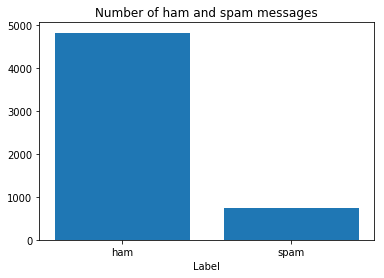

In [30]:
#Data Visualization
import matplotlib.pyplot as plt
plt.xlabel('Label')
plt.title('Number of ham and spam messages')
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique,counts)
plt.show()

In [3]:
#Cleaning of text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 5572):
    message = re.sub('[^a-zA-Z_0-9]', ' ', X[i])
    message = message.lower()
    message = message.split()
    ps = PorterStemmer()
    message = [ps.stem(word) for word in message if not word in set(stopwords.words('english'))]
    message = ' '.join(message)
    corpus.append(message)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Palash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000)
X = cv.fit_transform(corpus).toarray()

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)

In [24]:
#Importing Different Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
# Fitting Classifier to the Training set
svc = svm.SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [26]:
classifier = [svc, knn, mnb, dtc, lrc, rfc, abc, bc, etc]
classifier_names = ['SVM', 'KNN', 'MNB', 'DTC', 'LRC', 'RFC', 'ABC', 'BC', 'ETC']
for i in classifier:
    i.fit(X_train, y_train)

In [27]:
# Predicting the Test set results
acc = 0
y_pred = []
accuracy = []
for i in range(len(classifier)):
    y_pred.append(classifier[i].predict(X_test))
for y_pre in y_pred:
    acc = 0
    for i in range(len(y_pre)):
        if y_pre[i] == y_test[i]:
            acc += 1
    accuracy.append(100*(acc/len(y_pre)))

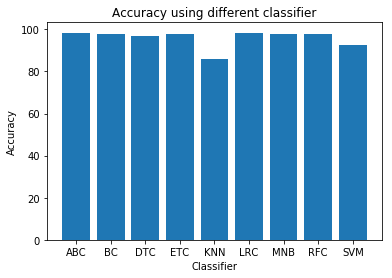

In [28]:
import matplotlib.pyplot as plt
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy using different classifier')
plt.bar(classifier_names, accuracy)
plt.show()

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
for i in range(len(y_pred)):
    cm = confusion_matrix(y_test, y_pred[i])
    print(classifier_names[i],"\n", cm)

SVM 
 [[1385   50]
 [  72  165]]
KNN 
 [[1435    0]
 [ 237    0]]
MNB 
 [[1408   27]
 [   8  229]]
DTC 
 [[1413   22]
 [  29  208]]
LRC 
 [[1429    6]
 [  21  216]]
RFC 
 [[1435    0]
 [  36  201]]
ABC 
 [[1430    5]
 [  28  209]]
BC 
 [[1418   17]
 [  23  214]]
ETC 
 [[1434    1]
 [  34  203]]
